# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats


## Reading data and initial processing

In [ ]:
#edit the file location of raw data set

from google.colab import files
 
 
uploaded = files.upload()


In [3]:

import pandas as pd
import io
 
df = pd.read_csv( 'Telecom Data.csv' )
cust_df = df.copy( deep = True )
print( cust_df )

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCall

## Exercise

## Placeholder for your analysis

In [4]:
# Type your code here to explore and understand the data better
print( cust_df.head() )

#e.g., identify the dimension of cust_df
print( cust_df.shape )

cust_df.describe()

#Print COunt of Unique values form Churn Col:
cust_df['Churn'].value_counts()

#Print % of Unique values from Churn Column:
per_uniq = ( cust_df.Churn.value_counts() / cust_df.shape[0] )*100
print(per_uniq)

   CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0   


## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [5]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
# count = ( cust_df[ 'MonthlyRevenue' ] == 0 ).sum()
# print( "Number of Customers with Zero monthly revenue = ",count )

# #METHOD-2
# cust_df[ cust_df[ 'MonthlyRevenue' ] <= 0 ]


#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

cust_df[cust_df.MonthlyRevenue == 0]

cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]  # including only those records where monthly revenue is more than 0

cust_df = cust_df[cust_df.MonthlyMinutes > 0.0] # # including only those records where monthly minutes is more than 0

cust_df.shape


(50162, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [6]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

per_miss = ( cust_df.isnull().sum() * 100 ) / cust_df.shape[0]
#print(per_miss)

#Convert this to DF:
df_per_mis = pd.DataFrame( { 'column_name' : cust_df.columns,
                             'mis_val_per' : per_miss } )
df_per_mis

cust_df.dropna( axis = 0, inplace = True)
cust_df.shape

(49078, 58)

<mark>__Result:__
    
Missing Values are very small, dropping rows containing those values will have no significant impact on those values.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

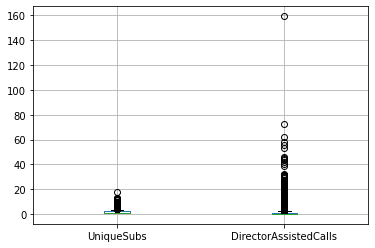

In [7]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=[ "UniqueSubs","DirectorAssistedCalls" ]
cust_df.boxplot( column=cols )

<AxesSubplot:>

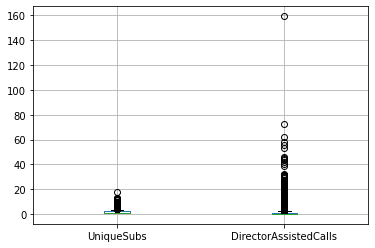

In [8]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again


#Use "quantile" function to identify top 1% outliers
q_val = [ i / 100 for i in range(95,101,1)]
cust_df['UniqueSubs'].quantile(q_val)

cust_df = cust_df[ ( cust_df.UniqueSubs <= 5 ) | ( cust_df.DirectorAssistedCalls <= 9.65 ) ]

cols=[ "UniqueSubs","DirectorAssistedCalls" ]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

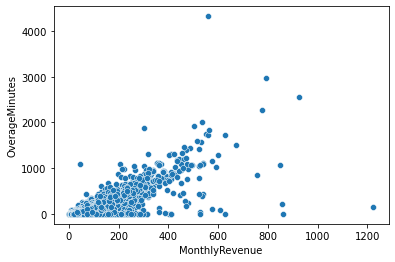

In [9]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

In [10]:
column_1 = cust_df["MonthlyRevenue"]
column_2 = cust_df["OverageMinutes"]
correlation = column_1.corr(column_2)
print(correlation)

0.7881852211525162


<mark>__Result:__
    

    From the above graph we can find that, the attributes MonthlyRevenue and Overage Minutes have a strong positive correlation which is 0.787 and it tends to +1.
    Thus, both the variables move in the same direction.
    Thus, if the customer works an extra time other than the pre paid allocation, his/her monthly revenue increases and vice versa.
    Thus both the variables are strongly correlated.


### Q2.2 Does high number of active subscribers lead to low monthly revenue?

1     34958
2     11729
3      1803
4       401
5       134
0        37
6         6
8         3
11        1
Name: ActiveSubs, dtype: int64


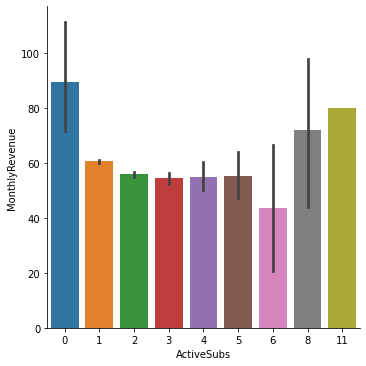

In [11]:
#use category plot to plot monthly revenue for each active subs category


print(cust_df['ActiveSubs'].value_counts())


sns.catplot( x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df, kind = 'bar' ) 

<mark>__Result:__
    
Higher Activer Subscribers, Lower Monthly Revenues.

### Q2.3 Does credit rating have an impact in churn rate?

In [12]:
print(cust_df['CreditRating'].value_counts())
pd.crosstab( cust_df.Churn, cust_df.CreditRating).apply( lambda r : r/r.sum(), axis = 0)
pd.crosstab( cust_df.Churn, cust_df.CreditRating).apply( lambda r : r/r.sum(), axis = 1)

2-High       18465
1-Highest     8213
3-Good        8112
5-Low         6246
4-Medium      5167
7-Lowest      2004
6-VeryLow      865
Name: CreditRating, dtype: int64


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.162674,0.368833,0.160659,0.109424,0.139455,0.018081,0.040874
Yes,0.179309,0.395246,0.177142,0.094784,0.096301,0.016472,0.040746


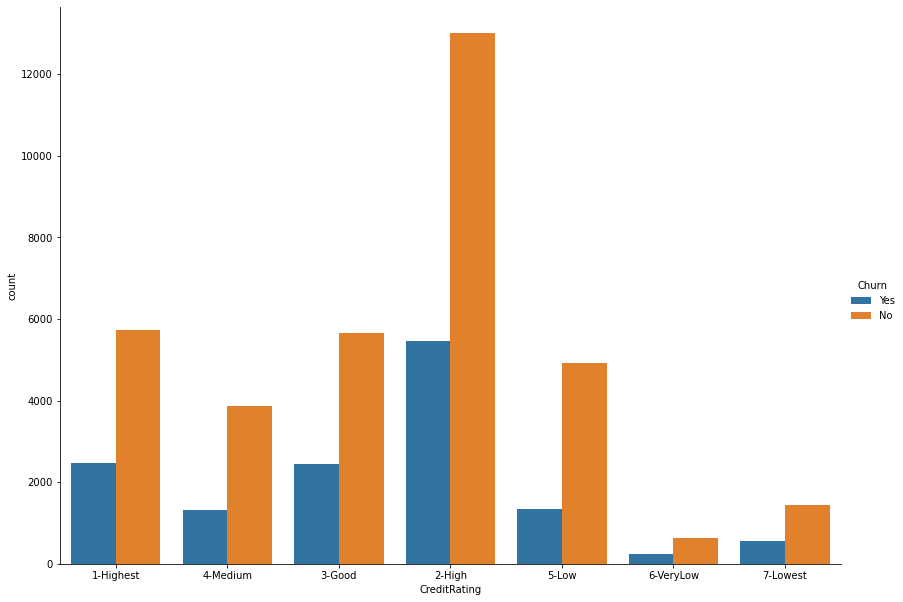

In [13]:
sns.catplot(x = 'CreditRating', kind = 'count', hue = "Churn", data = cust_df, height=8.27, aspect=11.7/8.27)


<mark>__Result:__
    
Irrespective of the customer's credit ratings, customers are churning and the proportion of churned customers is high on high credit score

### Placeholder for additional exploratory analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

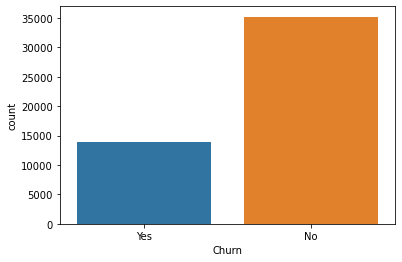

In [14]:
#type your code here for any additional exploratory analysis (if any)
sns.countplot(x=cust_df.Churn)

<ipython-input-15-5c831ae1000b>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  cust_df[1:].hist(ax=ax);


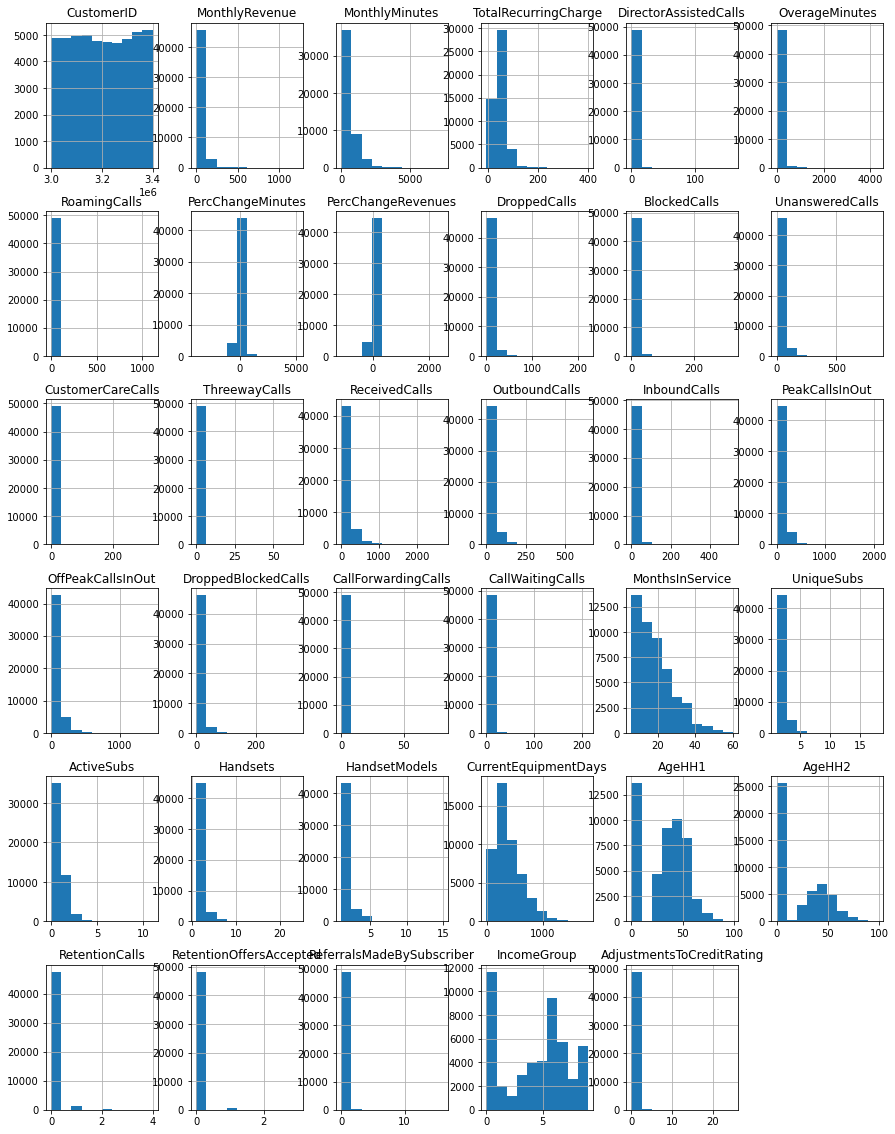

In [15]:
#Axis Comparison for all columns
fig = plt.figure( figsize = (15,20) )
ax = fig.gca()
cust_df[1:].hist(ax=ax);

In [16]:
cust_df.select_dtypes(float).columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')

In [17]:
cust_df.select_dtypes(int).columns

Index([], dtype='object')

In [18]:
cust_df.select_dtypes(object).columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

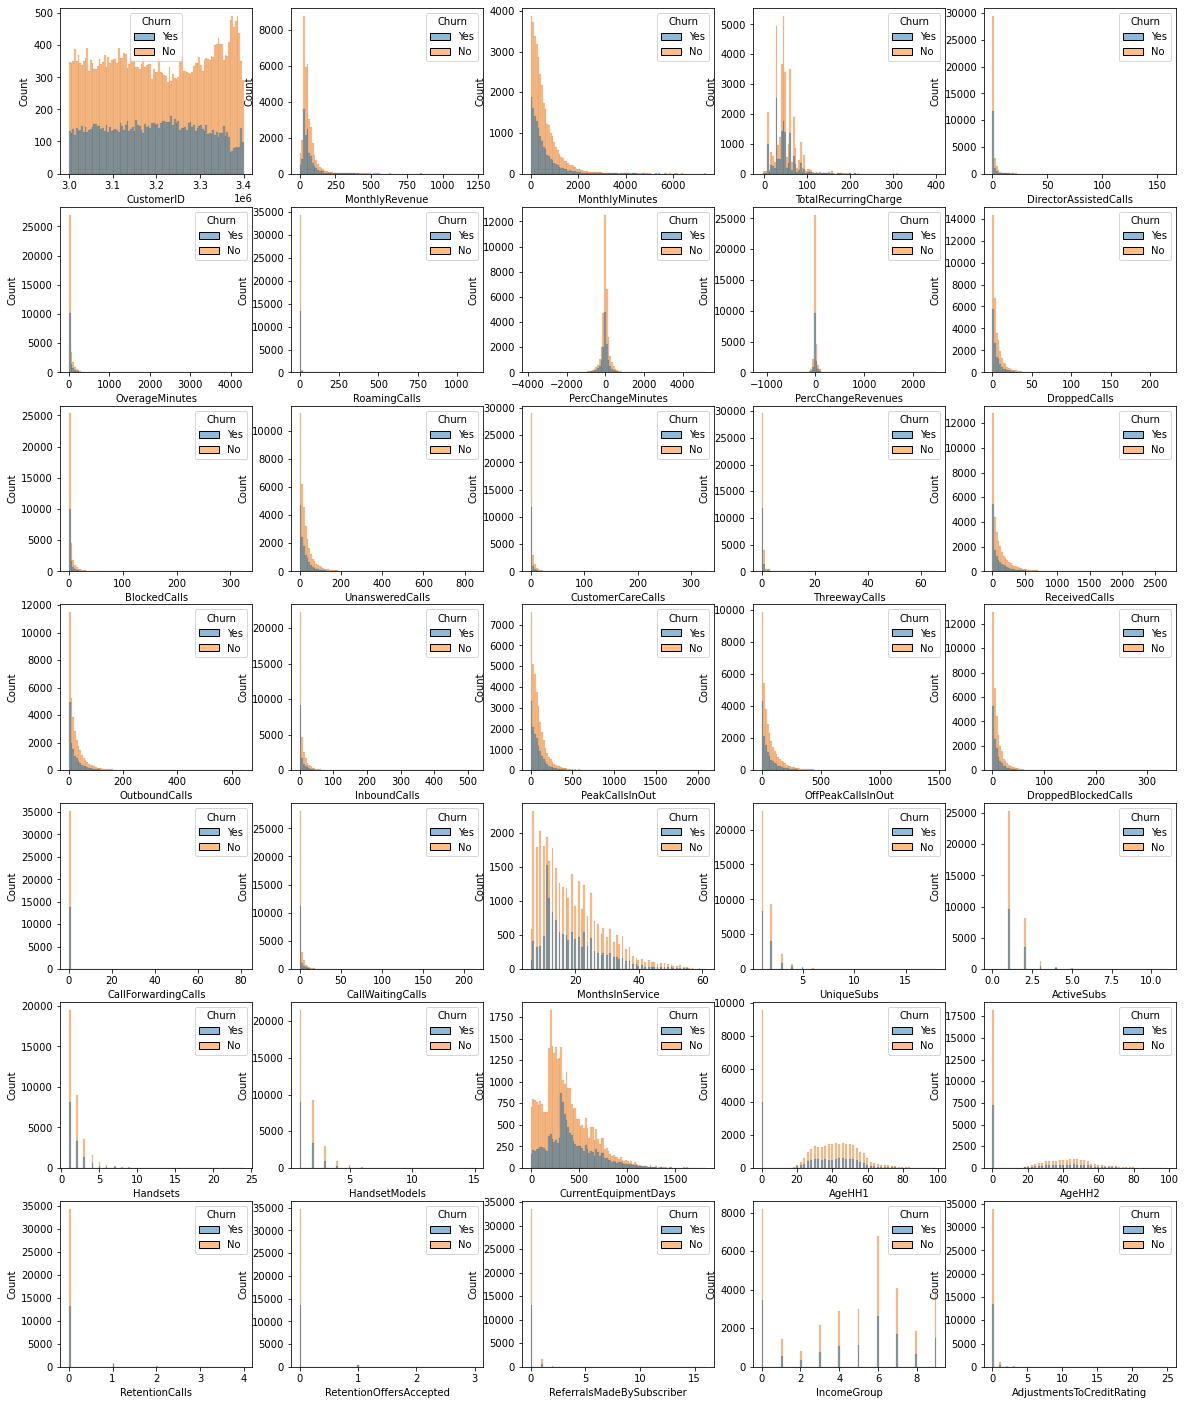

In [19]:
plots_per_row = 5

number_of_plots = cust_df.select_dtypes(exclude=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in cust_df.select_dtypes(exclude=['object']).columns.to_series().items():    
    a = sns.histplot(data=cust_df, x=col, hue="Churn", ax=axes[i],kde=False,bins=100)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()

fig.set_figwidth(20)
fig.set_figheight(25)

plt.show()

## Q3. Create additional features to help predict churn

In [20]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    #cust_df['perc_']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [21]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,No,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,No,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,No,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,No,0,10,No,4-Medium,Other,Other,No,1.0,0.911522
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,No,1,30,No,3-Good,Other,Other,Yes,1.0,1.366623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,No,0,Unknown,No,1-Highest,Other,Professional,No,1.0,0.782473
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,No,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,No,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,No,0,30,No,5-Low,Other,Professional,Yes,1.0,0.255341


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [25]:
cust_df.ServiceArea.nunique()

743

In [26]:
for i in list( cust_df.select_dtypes(object).columns):
    print( i, cust_df[i].nunique() )

Churn 2
ServiceArea 743
ChildrenInHH 2
HandsetRefurbished 2
HandsetWebCapable 2
TruckOwner 2
RVOwner 2
Homeownership 2
BuysViaMailOrder 2
RespondsToMailOffers 2
OptOutMailings 2
NonUSTravel 2
OwnsComputer 2
HasCreditCard 2
NewCellphoneUser 2
NotNewCellphoneUser 2
OwnsMotorcycle 2
HandsetPrice 16
MadeCallToRetentionTeam 2
CreditRating 7
PrizmCode 4
Occupation 8
MaritalStatus 3


In [27]:
#Creating Dummy Variables for all Categorical values:
cust_df.select_dtypes(object).columns

X = pd.get_dummies( cust_df.drop( ['ServiceArea'], axis = 1 ) )
#Dropping Service Area as it has too many unique values and will create too many columns.



In [28]:
X.shape

(49072, 109)

In [29]:
#Drop the Columns
X.drop(['Churn_No','ChildrenInHH_No','HandsetRefurbished_No','HandsetWebCapable_No','TruckOwner_No','RVOwner_No','Homeownership_Unknown','BuysViaMailOrder_No', 'RespondsToMailOffers_No', 'OptOutMailings_No',
       'NonUSTravel_No', 'OwnsComputer_No', 'HasCreditCard_No', 'NewCellphoneUser_No','NotNewCellphoneUser_No', 'OwnsMotorcycle_No','MadeCallToRetentionTeam_No','MaritalStatus_No'],axis=1,inplace = True)
X.shape

(49072, 91)

In [30]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

0.9.0


In [31]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
x = X.drop( ['Churn_Yes'], axis = 1 )
# Y = Dependent variable (churn flag)
y = X['Churn_Yes']

print( Counter(y) )

Counter({0: 35230, 1: 13842})


In [32]:
oversample = RandomOverSampler( sampling_strategy = 'minority' )
#This would make the minority class of the same length as the majority class.

X_over, y_over = oversample.fit_resample( x, y )

print( Counter(y_over) )

Counter({1: 35230, 0: 35230})


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

print( X_train.shape)
#print(X_train)
print(y_train.shape)
#print(X_test)

print(X_test.shape)
print(y_test.shape)


#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Fit and Transform on Input Data.
X_train = sc.fit_transform(X_train)
print( X_train.shape)
X_test = sc.fit_transform(X_test)
print(X_test.shape)

#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)

(49322, 90)
(49322,)
(21138, 90)
(21138,)
(49322, 90)
(21138, 90)


In [45]:
print(X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [34]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( random_state = 0)
lr.fit( X_train, y_train )


LogisticRegression(random_state=0)

In [35]:
#-------------------------------- Model testing ---------------------------------#

# #type your code here to predict for X_test data set using the fitted model
y_pred = lr.predict(X_test)
df_pred = pd.DataFrame(lr.predict_proba(X_test))
df_pred['Final Pred'] = y_pred

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
df_pred['Pred_70%'] = np.where(lr.predict_proba(X_test)[:,1]>0.7, 1, 0)  # if more than 70% then 1 else 0


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)   # actual values, predicted values

print("Confusion matrix: \n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Confusion matrix: 
 [[6285 4165]
 [4489 6199]]
Accuracy: 0.5905951367205979
              precision    recall  f1-score   support

           0       0.58      0.60      0.59     10450
           1       0.60      0.58      0.59     10688

    accuracy                           0.59     21138
   macro avg       0.59      0.59      0.59     21138
weighted avg       0.59      0.59      0.59     21138



In [37]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn,fp,fn,tp)


(6285, 4165, 4489, 6199)

In [38]:
print('Precsion from Logistic Regression is:', (tp)/(tp+fp))
print('Recall from Logistic Regression is:', (tp)/(tp+fn))
print('Accuracy from Logistic Regression is:',(tp+tn)/(tp+tn+fp+fn))

df_pred.head()


Precsion from Logistic Regression is: 0.5981281358548823
Recall from Logistic Regression is: 0.5799962574850299
Accuracy from Logistic Regression is: 0.5905951367205979


,0,1,Final Pred,Pred_70%
0,0.505668,0.494332,0,0
1,0.546224,0.453776,0,0
2,0.480692,0.519308,1,0
3,0.592055,0.407945,0,0
4,0.469947,0.530053,1,0


In [39]:
df_pred[df_pred[1] >= 0.7].head()


,0,1,Final Pred,Pred_70%
64,0.275718,0.724282,1,1
80,0.215492,0.784508,1,1
127,0.266859,0.733141,1,1
175,0.161329,0.838671,1,1
272,0.231019,0.768981,1,1


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [40]:
#-------------------------------- Model testing ---------------------------------#
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

#type your code here to predict for X_test data set using the fitted RF model
y_pred1 = rf.predict(X_test)
df_pred1 = pd.DataFrame(rf.predict_proba(X_test))
df_pred1['Final_Pred'] = y_pred1

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
df_pred1['Pred_70%']=np.where(rf.predict_proba(X_test)[:,1]>0.7,1,0) # if probability is greater than 0.7 then it is assigned 1 or else 0


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred1)

print("Confusion Matrix : \n", cm)
print('Accuracy', accuracy_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))


Confusion Matrix : 
 [[9244 1206]
 [1656 9032]]
Accuracy 0.8646040306556911
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     10450
           1       0.88      0.85      0.86     10688

    accuracy                           0.86     21138
   macro avg       0.87      0.86      0.86     21138
weighted avg       0.87      0.86      0.86     21138



In [41]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred1).ravel()
print('Precision from Random Forest Classifier is:', (tp)/(tp+fp))
print('Recall from Random Forest Classifier is:', (tp)/(tp+fn))
print('Accuracy from Random Forest Classifier is:',(tp+tn)/(tp+tn+fp+fn))




Precision from Random Forest Classifier is: 0.8822035553819105
Recall from Random Forest Classifier is: 0.8450598802395209
Accuracy from Random Forest Classifier is: 0.8646040306556911


<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
ANSWER: Random forest is better as it gives a good accuracy after doing oversampling, and Logistic Regression still gives 50% Accuracy.

### Q4.3 Identify most important features impacting churn

In [58]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
feature_list = X.columns[0:-1]
imp_feat = pd.Series( rf.feature_importances_, index = feature_list ) 
imp_feat

CustomerID                 0.043361
MonthlyRevenue             0.037894
MonthlyMinutes             0.040457
TotalRecurringCharge       0.027173
DirectorAssistedCalls      0.019750
                             ...   
Occupation_Professional    0.000921
Occupation_Retired         0.000978
Occupation_Self            0.000573
Occupation_Student         0.004746
MaritalStatus_Unknown      0.004330
Length: 90, dtype: float64

## Q5. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   